### Pistachio Image Dataset
#### Júlia Roberta Quoos Alves

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras

2.13.0


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array
from keras.applications.resnet import preprocess_input, decode_predictions

### Importação dos dados

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [5]:
# Imagens são obtidas dos diretórios
training_set = train_datagen.flow_from_directory('C:/Users/Jal/Documents/Tópicos Especiais/Treinamento',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')
test_set = test_datagen.flow_from_directory('C:/Users/Jal/Documents/Tópicos Especiais/Validação',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 1740 images belonging to 2 classes.
Found 408 images belonging to 2 classes.


In [7]:
print(training_set.class_indices)
print(training_set.filenames)
print(training_set.classes)

{'Kirmizi': 0, 'Siirt': 1}
['Kirmizi\\kirmizi (1).jpg', 'Kirmizi\\kirmizi (10).jpg', 'Kirmizi\\kirmizi (11).jpg', 'Kirmizi\\kirmizi (12).jpg', 'Kirmizi\\kirmizi (13).jpg', 'Kirmizi\\kirmizi (14).jpg', 'Kirmizi\\kirmizi (15).jpg', 'Kirmizi\\kirmizi (16).jpg', 'Kirmizi\\kirmizi (17).jpg', 'Kirmizi\\kirmizi (18).jpg', 'Kirmizi\\kirmizi (19).jpg', 'Kirmizi\\kirmizi (2).jpg', 'Kirmizi\\kirmizi (20).jpg', 'Kirmizi\\kirmizi (21).jpg', 'Kirmizi\\kirmizi (22).jpg', 'Kirmizi\\kirmizi (23).jpg', 'Kirmizi\\kirmizi (24).jpg', 'Kirmizi\\kirmizi (25).jpg', 'Kirmizi\\kirmizi (26).jpg', 'Kirmizi\\kirmizi (27).jpg', 'Kirmizi\\kirmizi (28).jpg', 'Kirmizi\\kirmizi (29).jpg', 'Kirmizi\\kirmizi (3).jpg', 'Kirmizi\\kirmizi (30).jpg', 'Kirmizi\\kirmizi (31).jpg', 'Kirmizi\\kirmizi (32).jpg', 'Kirmizi\\kirmizi (33).jpg', 'Kirmizi\\kirmizi (34).jpg', 'Kirmizi\\kirmizi (35).jpg', 'Kirmizi\\kirmizi (36).jpg', 'Kirmizi\\kirmizi (37).jpg', 'Kirmizi\\kirmizi (38).jpg', 'Kirmizi\\kirmizi (39).jpg', 'Kirmizi\\kirmizi 

### Definição da arquitetura da rede que será utilizada


In [6]:
# Sequential é um objeto que agrupa diversos níveis de uma RNA de forma sequencial
rna_conv = Sequential()
rna_conv = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), input_shape = [64, 64, 3], activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(200, activation=tf.nn.relu), #Camada oculta
    keras.layers.Dense(1, activation=tf.nn.relu), # Camada saída
])

In [7]:
# Mostra um resumo das características
rna_conv.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 500)              

In [8]:
rna_conv.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Treinamento

In [9]:
# Faz o treinamento da rede
# steps deve ser de acordo com o batch_size e o número de imagens
# mostra a perda, a  acurácia no conjunto de treinamento e no conjunto de teste
resultado=rna_conv.fit(training_set,steps_per_epoch = 80/32,epochs = 5,validation_data = test_set,validation_steps = 80/32)

Epoch 1/5
2/2 [==============================] - 5s 3s/step - loss: 5.1678 - accuracy: 0.5625 - val_loss: 0.7043 - val_accuracy: 0.7708
Epoch 2/5
2/2 [==============================] - 4s 2s/step - loss: 4.6831 - accuracy: 0.5938 - val_loss: 5.6778 - val_accuracy: 0.6042
Epoch 3/5
2/2 [==============================] - 1s 383ms/step - loss: 4.1249 - accuracy: 0.6875 - val_loss: 1.8653 - val_accuracy: 0.6979
Epoch 4/5
2/2 [==============================] - 1s 377ms/step - loss: 3.7292 - accuracy: 0.6458 - val_loss: 2.7731 - val_accuracy: 0.7396
Epoch 5/5
2/2 [==============================] - 1s 355ms/step - loss: 2.9112 - accuracy: 0.7083 - val_loss: 2.4219 - val_accuracy: 0.7396


In [10]:
rna_conv.save("cnn.h5")

C:\Users\Jal\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Resultados

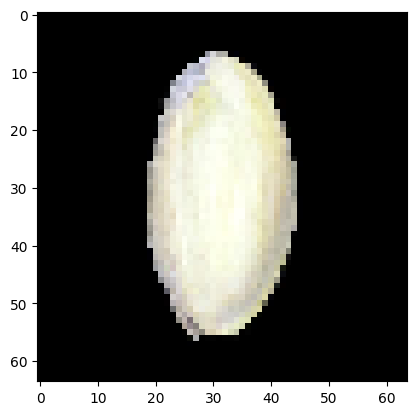

In [13]:
# Carrega e mostra a imagem
img_path = 'C:/Users/Jal/Documents/Tópicos Especiais/Validação/siirt/siirt 709.jpg'
img_siirt = load_img(img_path, target_size=(64, 64))
plt.imshow(img_siirt)
plt.show()

In [ ]:
img_array = img_to_array(img_siirt)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed_siirt = preprocess_input(img_batch)

In [16]:
prediction = rna_conv.predict(img_preprocessed_siirt, batch_size=32)
print(prediction)

1/1 [==============================] - 0s 32ms/step
[[244.09874]]


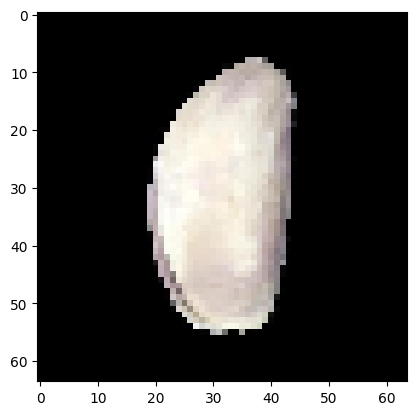

In [44]:
img_path = 'C:/Users/Jal/Documents/Tópicos Especiais/Validação/Kirmizi/kirmizi 928.jpg'
img_kirmizi = load_img(img_path, target_size=(64, 64))
plt.imshow(img_kirmizi)
plt.show()

In [45]:
img_array = img_to_array(img_kirmizi)
img_batch = np.expand_dims(img_array, axis=0)
img_preprocessed_kirmizi = preprocess_input(img_batch)

In [46]:
prediction = rna_conv.predict(img_preprocessed_kirmizi, batch_size=32)
print(prediction)

1/1 [==============================] - 0s 20ms/step
[[249.3248]]


In [ ]:
# Carrega um modelo já treinado
model = load_model('cnn.h5')
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])